# AIDL_01 Project, Linear Regression for Laptop Price Prediction

Στο συγκεκριμένο dataset θα γίνει γίνει αρχικά μια διερευνητική ανάλυση των δεδομένων. Στόχος μας είναι να δούμε ποιοι παράγοντες (features) είναι αυτοί που είναι περισσότερο εξαρτημένοι με την μεταβλητή της τιμής και άρα την επηρρεάζουν και περισσότερο. Για να αναλύσουμε λοιπόν τη συσχέτιση της τιμής με τις υπόλοιπες μεταβλητές θα εφαρμόσουμε μηχανική μάθηση και συγκεκριμένα ένα μοντέλο γραμμικής παλινδρόμησης. 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
lap = pd.read_csv("C:\\Users\\georg\\Desktop\\AIDL NOTES\\AIDL_03\\data\\laptopPrice.csv")

In [3]:
lap.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
exchange_rate = 0.011
# Convert the 'Price' column from Indian currency to Euro
lap['Price_euro'] = lap['Price'] * exchange_rate

In [5]:
lap.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews,Price_euro
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0,381.139
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5,428.989
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1,439.989
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0,769.890
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0,296.890


In [6]:
lap.tail(5).T

,818,819,820,821,822
brand,ASUS,ASUS,ASUS,ASUS,Lenovo
processor_brand,AMD,AMD,AMD,AMD,AMD
processor_name,Ryzen 9,Ryzen 9,Ryzen 9,Ryzen 9,Ryzen 5
processor_gnrtn,Not Available,Not Available,Not Available,Not Available,10th
ram_gb,4 GB,4 GB,4 GB,4 GB,8 GB
ram_type,DDR4,DDR4,DDR4,DDR4,DDR4
ssd,1024 GB,1024 GB,1024 GB,1024 GB,512 GB
hdd,0 GB,0 GB,0 GB,0 GB,0 GB
os,Windows,Windows,Windows,Windows,DOS
os_bit,64-bit,64-bit,64-bit,64-bit,64-bit


In [7]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              823 non-null    object 
 1   processor_brand    823 non-null    object 
 2   processor_name     823 non-null    object 
 3   processor_gnrtn    823 non-null    object 
 4   ram_gb             823 non-null    object 
 5   ram_type           823 non-null    object 
 6   ssd                823 non-null    object 
 7   hdd                823 non-null    object 
 8   os                 823 non-null    object 
 9   os_bit             823 non-null    object 
 10  graphic_card_gb    823 non-null    object 
 11  weight             823 non-null    object 
 12  warranty           823 non-null    object 
 13  Touchscreen        823 non-null    object 
 14  msoffice           823 non-null    object 
 15  Price              823 non-null    int64  
 16  rating             823 non

In [8]:
lap.shape

(823, 20)

In [9]:
lap.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews', 'Price_euro'],
      dtype='object')

In [10]:
#Checking missing values
#Checking duplicates
#Checking data types of each column
#Checking the number of unique values of each column
#Checking statistics of data set
#Checking various categories present in different categorical column

Checking missing values

In [11]:
lap.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
Price_euro           0
dtype: int64

Checking for duplicated values

In [12]:
lap.duplicated().sum()

21

In [13]:
lap = lap.drop_duplicates()

In [14]:
lap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 0 to 822
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              802 non-null    object 
 1   processor_brand    802 non-null    object 
 2   processor_name     802 non-null    object 
 3   processor_gnrtn    802 non-null    object 
 4   ram_gb             802 non-null    object 
 5   ram_type           802 non-null    object 
 6   ssd                802 non-null    object 
 7   hdd                802 non-null    object 
 8   os                 802 non-null    object 
 9   os_bit             802 non-null    object 
 10  graphic_card_gb    802 non-null    object 
 11  weight             802 non-null    object 
 12  warranty           802 non-null    object 
 13  Touchscreen        802 non-null    object 
 14  msoffice           802 non-null    object 
 15  Price              802 non-null    int64  
 16  rating             802 non

In [15]:
lap.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
Price_euro           405
dtype: int64

In [16]:
lap.describe()

,Price,Number of Ratings,Number of Reviews,Price_euro
count,802.000000,802.00000,802.000000,802.000000
mean,76625.543641,299.84414,36.089776,842.880980
std,45232.984422,1001.78442,118.313553,497.562829
min,16990.000000,0.00000,0.000000,186.890000
25%,45990.000000,0.00000,0.000000,505.890000
50%,63990.000000,17.00000,2.000000,703.890000
75%,89525.000000,140.25000,18.000000,984.775000
max,441990.000000,15279.00000,1947.000000,4861.890000


Συμπέρασμα: 1. Δεν ύπαρχουν missing values, 2. Υπάρχουν ακραίες τιμές στις στήλες με αριθμητικές τιμές

Διαχωρισμός αριθμητικών και κατηγορικών τιμών

In [18]:
numeric_columns = [feature for feature in lap.columns if lap[feature].dtype != 'object']
cat_columns = [feature for feature in lap.columns if lap[feature].dtype == 'object']
print("Numerical Columns: ", numeric_columns)
print("Categorical Columns:", cat_columns)

Numerical Columns:  ['Price', 'Number of Ratings', 'Number of Reviews', 'Price_euro']
Categorical Columns: ['brand', 'processor_brand', 'processor_name', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']


Συμπέρασμα: έχουμε μόνο 4 στήλες με αριθμητικές τιμές ενώ όλες οι υπόλοιπες στήλες εμπεριέχουν κατηγορικές τιμές. 

# Data Visualisation

Brands

Text(0.5, 1.0, 'Boxplot of Prices by Brands')

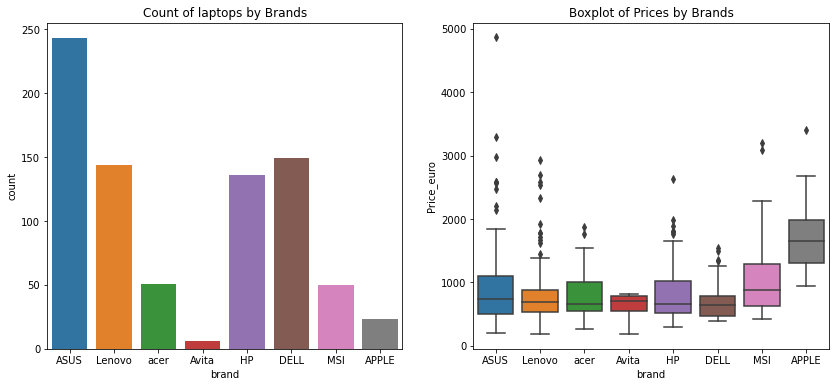

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=lap.brand)
axes[0].set_title("Count of laptops by Brands")

sns.boxplot(ax=axes[1], x=lap.brand, y=lap.Price_euro)
axes[1].set_title("Boxplot of Prices by Brands")

Processor

Text(0.5, 1.0, 'Boxplot of Prices by Processor')

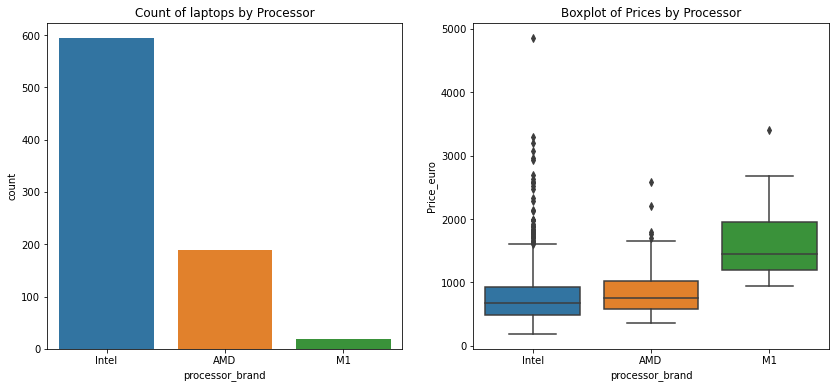

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=lap.processor_brand)
axes[0].set_title("Count of laptops by Processor")

sns.boxplot(ax=axes[1], x=lap.processor_brand, y=lap.Price_euro)
axes[1].set_title("Boxplot of Prices by Processor")

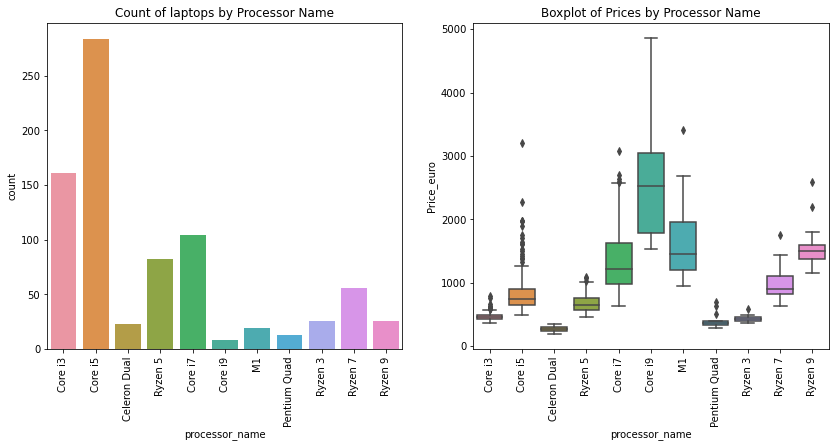

In [21]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=lap.processor_name)
axes[0].set_title("Count of laptops by Processor Name")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], x=lap.processor_name, y=lap.Price_euro)
axes[1].set_title("Boxplot of Prices by Processor Name")
axes[1].tick_params(axis='x', rotation=90)

Ram GB

Text(0.5, 1.0, 'Boxplot of Prices by Ram Gb')

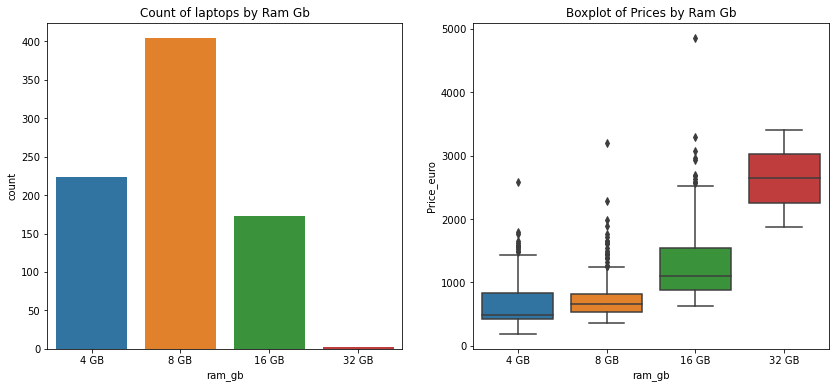

In [22]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=lap.ram_gb)
axes[0].set_title("Count of laptops by Ram Gb")

sns.boxplot(ax=axes[1], x=lap.ram_gb, y=lap.Price_euro)
axes[1].set_title("Boxplot of Prices by Ram Gb")

SSD

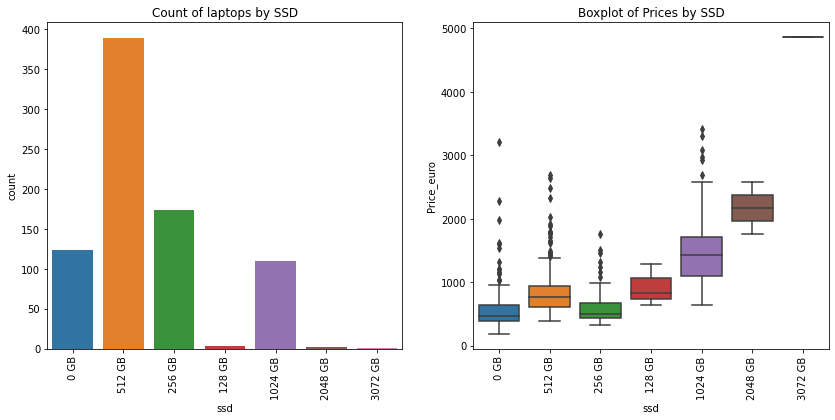

In [23]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=lap.ssd)
axes[0].set_title("Count of laptops by SSD")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(ax=axes[1], x=lap.ssd, y=lap.Price_euro)
axes[1].set_title("Boxplot of Prices by SSD")
axes[1].tick_params(axis='x', rotation=90)

Touchscreen

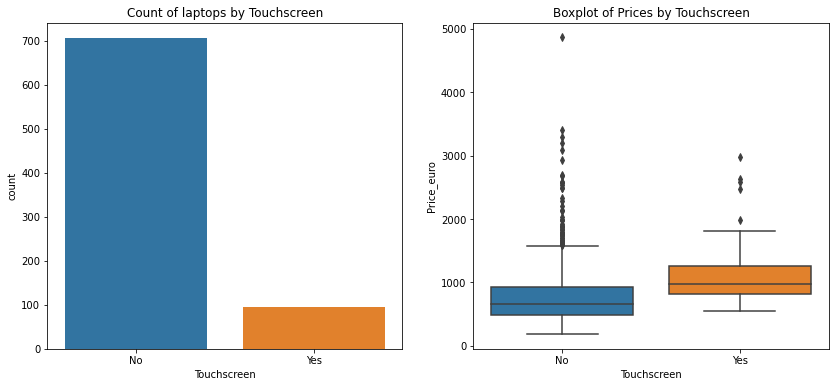

In [24]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=lap.Touchscreen)
axes[0].set_title("Count of laptops by Touchscreen")

sns.boxplot(ax=axes[1], x=lap.Touchscreen, y=lap.Price_euro)
axes[1].set_title("Boxplot of Prices by Touchscreen");

Operating System

Text(0.5, 1.0, 'Boxplot of Prices by OS')

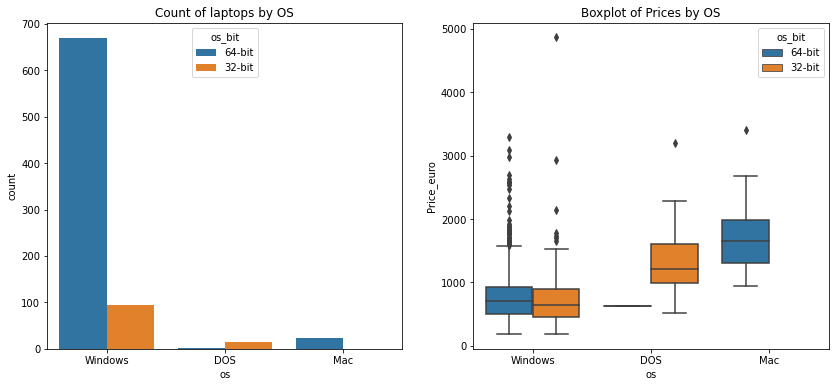

In [25]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=lap.os, hue=lap.os_bit)
axes[0].set_title("Count of laptops by OS")

sns.boxplot(ax=axes[1], x=lap.os, y=lap.Price_euro, hue=lap.os_bit)
axes[1].set_title("Boxplot of Prices by OS")

Από την απεικόνιση των δεδομένων μας, βγάζουμε τα εξής συμπεράσματα: 
- η ASUS έχει τα περισσότερα δείγματα στο σύνολο δεδομένων, ενώ η APPLE τις πιο υψηλές τιμές.
- ο επεξεργαστής των περισσότερων laptop είναι της εταρείας Intell, ενώ οι Μ1 έχουν τις υψηλότερες τιμές της αγοράς. 
- ο επεξεργαστης intell core i9 είναι ο πιο συγχρονος και γρηγορότερος της αγοράς, όμως τα πιο πολλά laptop έχουν επεξεργαστή intel core i3 ή intell core i5.
- η πιο δημοφιλής μνήμη RAM είναι στα 8 gb,ενώ βλέπουμε οτι όσο αυξάνεται η χωρητικότητα αυξάνεται και η τιμή άρα είναι άμεσα εξαρτημένη μεταβλητή της τιμής. 
- τα περισσότερα laptop έχουν χωρητικότητα σκληρού δίσκου 512 gb. Βλέπουμε και εδώ ότι η αυξηση χωρητικότητας συσχετίζεται άμεσα με την αύξηση της τιμής. 
- τα 7 από τα 8 laptop δεν έχουν οθόνη αφής.
- το πιο δημοφιλές λειτουργικό είναι των Windows ενώ παρατηρούμε ότι είναι και το πιο οικονομικό.

Απομάκρυνση Ακραίων Τιμών

In [26]:
def remove_outlier_IQR(lap, column):
    # sort values in ascending order in order to calculate the quartiles and the IQR 
    sorts = lap[column].sort_values()
    
    Q1 = sorts.quantile(0.25)    
    Q3 = sorts.quantile(0.75)    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # exclude rows from the dataframe above and below bounds
    lap_final = lap[(lap[column] >= lower_bound) & (lap[column] <= upper_bound)].reset_index(drop=True)    
    
    return lap_final

In [27]:
lap1 = remove_outlier_IQR(lap, "Price")
lap2 = remove_outlier_IQR(lap1, "Number of Reviews")
lap_clean = remove_outlier_IQR(lap2, "Number of Ratings")

Αντικατάσταση του Not Available, με την πιο κοινή τιμή

In [28]:
lap['processor_gnrtn'].replace('Not Available', lap['processor_gnrtn'].mode()[0], inplace=True)

In [29]:
lap_clean.shape

(543, 20)

Clean Rating Column

In [30]:
lap_clean['rating'] = lap_clean['rating'].str.split().str[0].astype('int')


Turn Categorical Values to dummies (One Hot Encoding)

In [31]:
lap_final = pd.get_dummies(lap_clean, columns=cat_columns, drop_first=True)
lap_final

,Price,Number of Ratings,Number of Reviews,Price_euro,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2,rating_3,rating_4,rating_5
0,34649,3,0,381.139,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,38999,65,5,428.989,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,39999,8,1,439.989,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,69990,0,0,769.890,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,26990,0,0,296.890,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,135990,0,0,1495.890,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
539,144990,0,0,1594.890,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
540,149990,0,0,1649.890,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
541,142990,0,0,1572.890,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Correlation Matrix

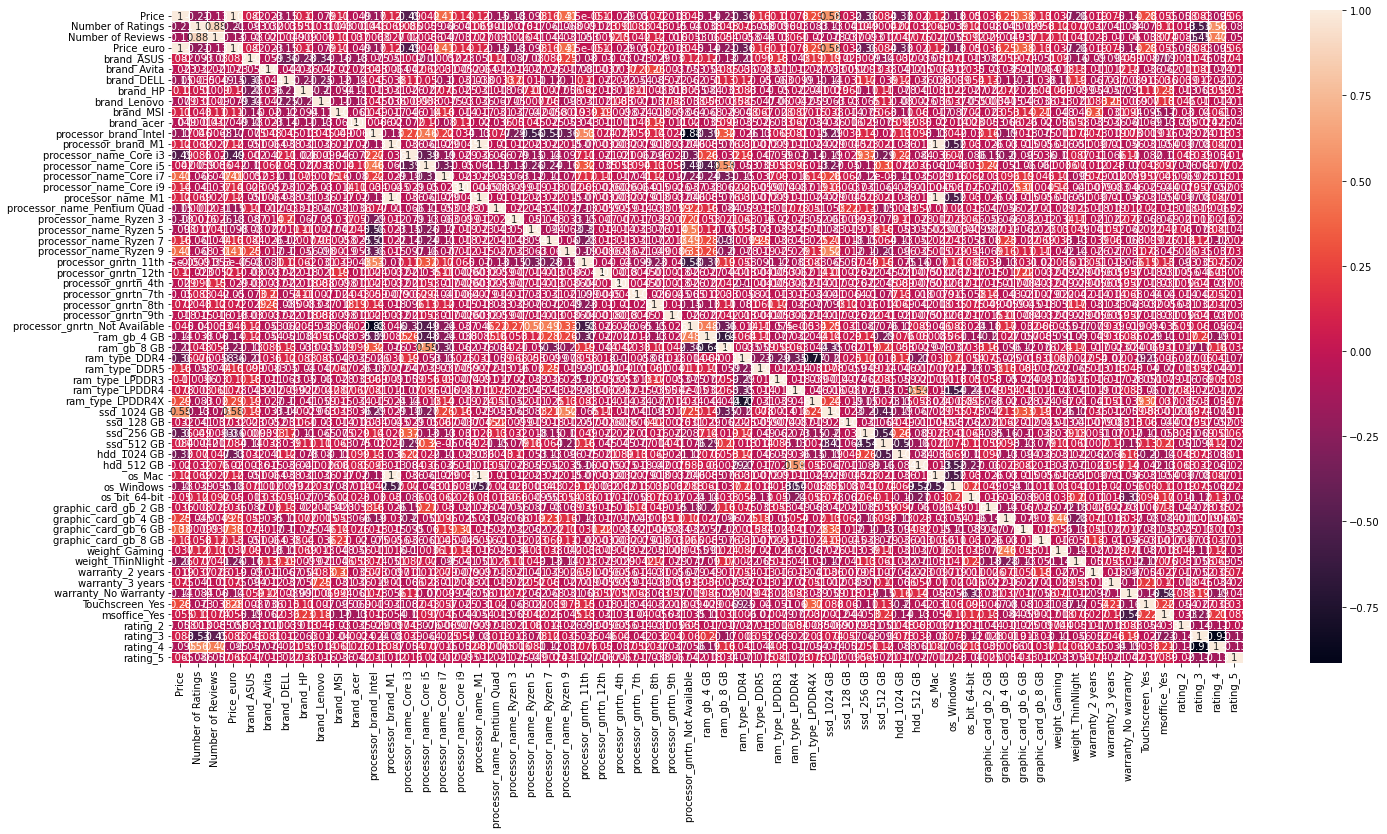

In [32]:
plt.figure(figsize = (24, 12))

corr = lap_final.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [33]:
correlation = lap_final.corr()['Price_euro'].abs().sort_values(ascending = False)
correlation

Price                     1.000000
Price_euro                1.000000
ssd_1024 GB               0.576989
processor_name_Core i3    0.485603
processor_name_Ryzen 9    0.406945
                            ...   
brand_Avita               0.022991
hdd_512 GB                0.020321
warranty_2 years          0.018981
processor_gnrtn_9th       0.017964
processor_gnrtn_11th      0.000035
Name: Price_euro, Length: 61, dtype: float64

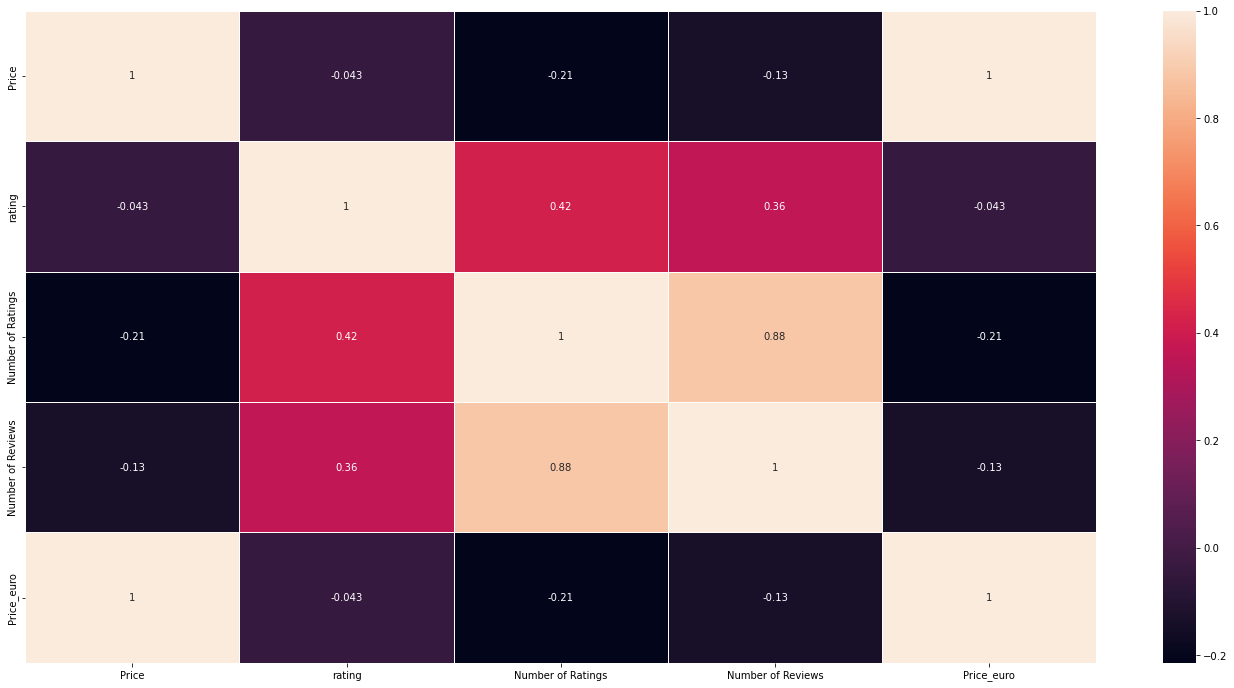

In [34]:
plt.figure(figsize = (24, 12))

corr = lap_clean.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

# Linear Regression Model

In [35]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
X = lap_final.loc[:, ~lap_final.columns.isin(["Price", "Price_euro"])]
y = lap_final['Price_euro']

Splitting our dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1 )

In [38]:
print("X_train size:", X_train.shape)
print("y_train size:", y_train.shape)

print("X_test size:", X_test.shape)
print("y_test size:", y_test.shape)

X_train size: (407, 59)
y_train size: (407,)
X_test size: (136, 59)
y_test size: (136,)


Define the model 

In [39]:
linear_regressor = LinearRegression()

Train the model

In [40]:
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
inputs = X

In [42]:
print(linear_regressor.intercept_)
print(linear_regressor.coef_)
print(inputs)

214.2827611915268
[-7.14062567e-01  2.92330648e-01 -4.05465434e+01 -2.69058704e+02
  1.29248185e+01  6.89819055e+01  7.60712154e+00 -5.30033450e+01
 -6.21915429e+01 -6.60476877e+01  3.35286290e+02  7.44151639e+02
  9.80707400e+02  1.13419275e+03  1.25057839e+03  3.35286290e+02
  1.15644644e+02  4.89137994e+01  2.06182045e+02  3.52232010e+02
  6.71507158e+02 -1.94496045e+01  1.73291547e+02 -2.53966509e+02
 -4.27510402e+00  1.22675512e+02 -2.36834383e+02  5.95870640e+02
 -3.36636406e+01 -2.77144590e+01 -1.70525584e+02  1.54263259e+02
 -1.01383839e+02 -2.30912964e+02 -7.25479731e+01  3.13725342e+02
  1.60754911e+02  8.35251564e+01  1.67289747e+02  2.71486280e+01
  9.99384808e+01  3.35286290e+02 -4.64187920e+02  2.97256155e+01
  8.94697541e+00  5.11593121e+01  3.17194999e+02 -4.54747351e-13
 -4.15692478e+01 -3.71554182e+01 -4.58166292e+01  7.64874187e+01
 -2.61850485e+01  1.18399551e+02 -4.08615359e+01  1.80949507e+02
  2.06747358e+02  1.39698161e+02  2.05188943e+02]
     Number of Ratings

Evaluate Model Performance

In [43]:
y_pred = linear_regressor.predict(X_test)

In [44]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred, squared=False)
r2=r2_score(y_test, y_pred)

In [45]:
print("Model performance")
print("--------------------------------------")
print('Mean Absolute Error= ', mae)
print('Mean Squared Error= ', mse)
print('Root Mean Squared Error = ',rmse)
print('R2 score = ',r2)

Model performance
--------------------------------------
Mean Absolute Error=  94.35003728589297
Mean Squared Error=  18201.80983458818
Root Mean Squared Error =  134.9140831588318
R2 score =  0.8139066376305343


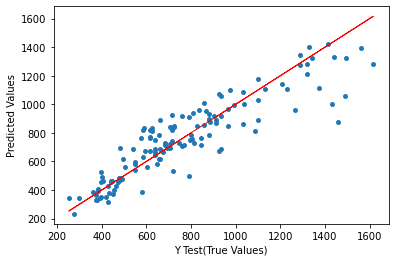

In [46]:
plt.scatter(y_test,y_pred,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

Model 2

In [47]:
X2 = lap_final[['ssd_1024 GB','processor_name_Core i3','processor_name_Ryzen 9',
                   'processor_name_Core i7','graphic_card_gb_6 GB','ssd_256 GB','ram_type_DDR4','hdd_1024 GB',
                   'ram_type_LPDDR4X','Touchscreen_Yes','weight_ThinNlight','graphic_card_gb_4 GB','Number of Ratings',
                   'ram_gb_8 GB']]
y2 = lap_final['Price_euro']

In [48]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 1 )

In [49]:
print("X2_train size:", X_train.shape)
print("y2_train size:", y_train.shape)

print("X2_test size:", X_test.shape)
print("y2_test size:", y_test.shape)

X2_train size: (407, 59)
y2_train size: (407,)
X2_test size: (136, 59)
y2_test size: (136,)


In [50]:
linear_regressor2 = LinearRegression()

In [51]:
linear_regressor2.fit(X2_train, y2_train)

LinearRegression()

In [52]:
y2_pred = linear_regressor2.predict(X2_test)

In [53]:
mae2=mean_absolute_error(y2_test, y2_pred)
mse2=mean_squared_error(y2_test, y2_pred)
rmse2=mean_squared_error(y2_test, y2_pred, squared=False)
r22=r2_score(y2_test, y2_pred)

In [54]:
print("Model 2 performance")
print("--------------------------------------")
print('Mean Absolute Error= ', mae2)
print('Mean Squared Error= ', mse2)
print('Root Mean Squared Error = ',rmse2)
print('R2 score = ',r22)

Model 2 performance
--------------------------------------
Mean Absolute Error=  119.9656725027656
Mean Squared Error=  27927.823734450172
Root Mean Squared Error =  167.1161983006141
R2 score =  0.7144689088812697


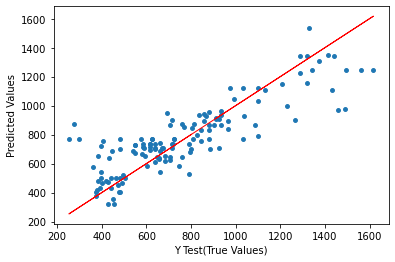

In [55]:
plt.scatter(y2_test,y2_pred,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y2_test, y2_test, color='red', lw=1)

plt.show()